<img style="float: right; margin: 45px 22px 22px 22px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="600" height="960" /> 
    
    
# <font color='navy'> Quantitative Finance

**Students:**
    
    Espinosa García, Lyha 
    Flores Ortiz, Moisés
    Lares Barragán, Andrés
    Rosas Medellín, Miriam Eunice
    Vázquez Vargas, Ana Cristina
    
**Date:**

    December 4th, 2021

**Professor:** 	
    
    José Mario Zárate Carbajal

    
# Option Greeks

In [1]:
import numpy as np, scipy.stats as si, matplotlib.pyplot as plt

In [52]:
class Option:
    
    # Definir y asignar los atributos del objeto.
    def __init__(self, tipo:str, S:float, K:float, r:float, sigma:float, T: int, q:float = None):
        if tipo is None:
            raise ValueError("Defina un tipo de opción (call/put).")
        if q is None:
            q = 0
        self.tipo = tipo
        self.S = S
        self.K = K
        self.r = r
        self.sigma = sigma
        self.T = T
        self.q = q
        self.d1 = (np.log(self.S / self.K) + (self.r - self.q + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = (np.log(self.S / self.K) + (self.r - self.q - 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    
    
    ######################   
    #Funciones Auxiliares#
    ######################
    
    def get_fv(self)->float:
        if self.tipo=='call':
            self.fv = self.S * si.norm.cdf(self.d1, 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2, 0.0, 1.0)
            return self.fv
        elif self.tipo=='put':
            self.fv = self.K*np.exp(-self.r*self.T)*si.norm.cdf(-self.d2, 0.0, 1.0) - self.S*si.norm.cdf(-self.d1, 0.0, 1.0)
            return self.fv
    
    @staticmethod
    def N_biprima(self, d) ->float:
        """
        Evalúa el valor de 'd' en la segunda derivada de la 
        C.D.F de la distribución normal.
        """
        return -(d*np.exp((-d**2)/(2)))/(np.sqrt(2*np.pi))
        
        
    #########################    
    #Griegas de Primer Orden#
    #########################
    
    def get_delta(self)->float:
        if self.tipo=='call':
            self.delta= si.norm.cdf(self.d1)
            return self.delta
        elif self.tipo=='put':
            self.delta = -si.norm.cdf(-self.d1)
            return self.delta
        
    def get_vega(self)->float:
        self.vega=self.S*si.norm.pdf(self.d1)*np.sqrt(self.T)
        return self.vega
    
    def get_rho(self)->float:
        if self.tipo=='call':
            self.rho = self.K*self.T*np.exp(-self.r*self.T)*si.norm.cdf(self.d2) 
            return self.rho
        elif self.tipo=='put':
            self.rho= -self.K*self.T*np.exp(-self.r*self.T)*si.norm.cdf(-self.d2)
            return self.rho
        
    def get_lambda(self)->float:
        if self.tipo=='call': 
            self.lam = (si.norm.cdf(self.d1)*self.S)/(self.S*si.norm.cdf(self.d1)-self.K*np.exp(-self.r*(self.T))*si.norm.cdf(self.d2)) 
            return self.lam
        elif self.tipo=='put':
            self.lam= (-si.norm.cdf(-self.d1)*self.S)/(self.K*np.exp(-self.r*(self.T))*si.norm.cdf(-self.d2)-self.S*si.norm.cdf(-self.d1))
            return self.lam
        
    def get_epsilon(self)->float:
        if self.tipo=='call':
            self.epsilon = -self.S*(self.T)*np.exp(-self.q*self.T)*si.norm.cdf(self.d1)
            return self.epsilon
        elif self.tipo=='put':
            self.epsilon =  self.S*(self.T)*np.exp(-self.q*self.T)*si.norm.cdf(-self.d1)
            return self.epsilon

    ##########################   
    #Griegas de Segundo Orden#
    ##########################
    
    def get_gamma(self)->float:
        self.gamma = si.norm.pdf(self.d1)/(self.S*self.sigma*np.sqrt(self.T)) 
        return self.gamma
    
    def get_veta(self) ->float:
        #self.veta = self.S(np.sqrt(self.T)*N_biprima(self.d1)*??? + si.norm.pdf(self.d1)/(2*np.sqrt(self.T)))  
        pass
        
    def get_vera(self)->float:
        self.vera = (self.S*self.T*Option.N_biprima(self, self.d1))/(self.sigma)
        return self.vera
        
    
    #########################   
    #Griegas de Tercer Orden#
    #########################        

    

# Delta & Gamma Sens.

In [72]:
n_opc = 61 # cantidad de contratos a evaluar

S    =  np.linspace(20,80,n_opc)
tipo_call = ['call']*n_opc
tipo_put  = ['put']*n_opc
K    = np.ones(n_opc)*50
T    = np.ones(n_opc)
r    = np.ones(n_opc)*.05
vol  = np.ones(n_opc)*0.257841618330987

call_options = [Option(tipo_call[i],S[i],K[i],r[i],vol[i],T[i]) for i in range(n_opc)]
put_options  = [Option(tipo_put[i],S[i],K[i],r[i],vol[i],T[i]) for i in range(n_opc)]

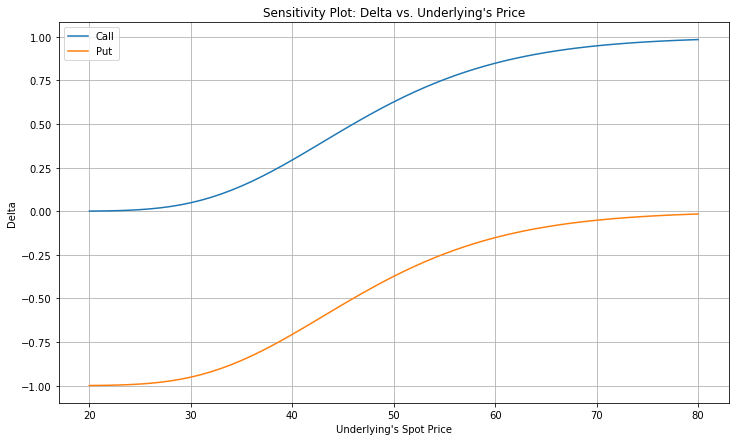

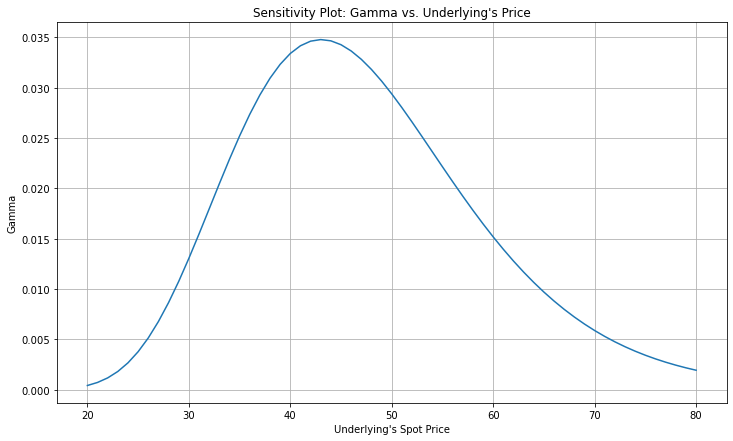

In [83]:
Call_greek = [call_options[j].get_delta() for j in range(n_opc)]
Put_greek  = [put_options[j].get_delta() for j in range(n_opc)]
Gamma= [call_options[j].get_gamma() for j in range(n_opc)]

plt.figure(figsize=(12, 7))
plt.title("Sensitivity Plot: Delta vs. Underlying's Price")
plt.plot(S, Call_greek, label='Call')
plt.plot(S, Put_greek, label='Put')
plt.ylabel("Delta")
plt.xlabel("Underlying's Spot Price")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(12, 7))
plt.title("Sensitivity Plot: Gamma vs. Underlying's Price")
plt.plot(S, Gamma)
plt.ylabel("Gamma")
plt.xlabel("Underlying's Spot Price")
plt.grid()
plt.show()

**Validación**

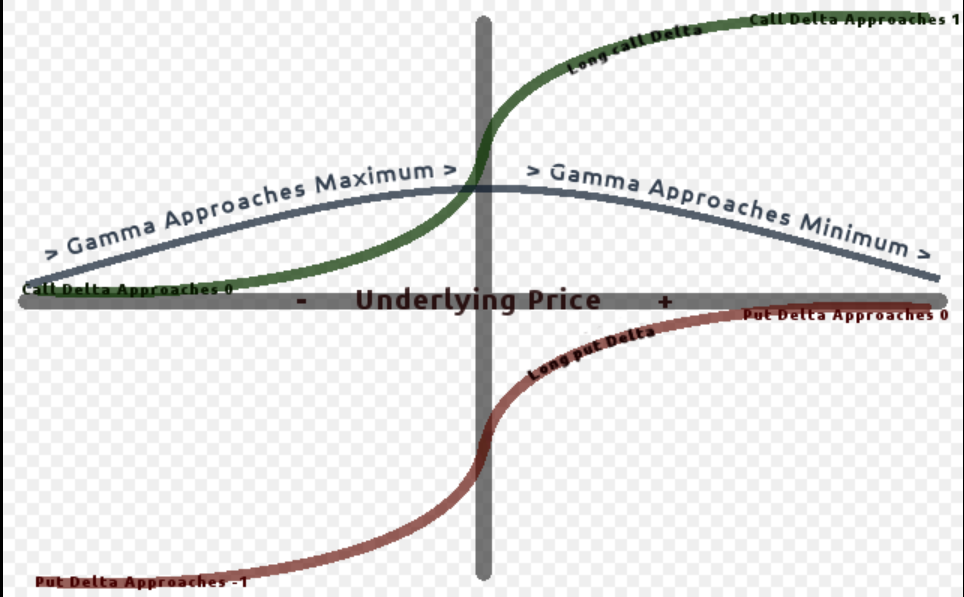

# Rho Sens.

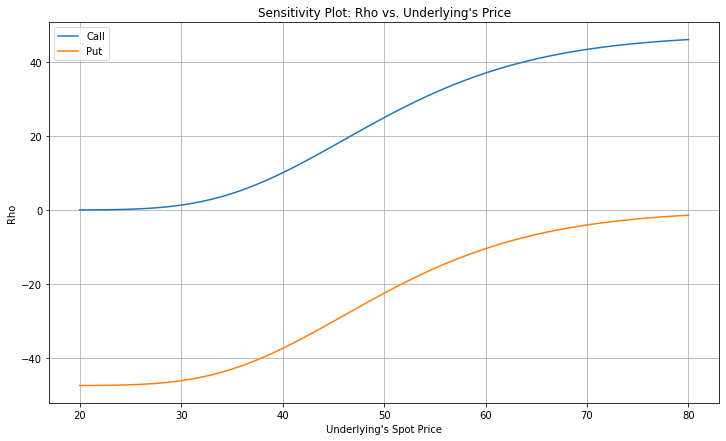

In [81]:
n_opc = 61 # cantidad de contratos a evaluar

S    =  np.linspace(20,80,n_opc)
tipo_call = ['call']*n_opc
tipo_put  = ['put']*n_opc
K    = np.ones(n_opc)*50
T    = np.ones(n_opc)
r    = np.ones(n_opc)*.05
vol  = np.ones(n_opc)*0.257841618330987

call_options = [Option(tipo_call[i],S[i],K[i],r[i],vol[i],T[i]) for i in range(n_opc)]
put_options  = [Option(tipo_put[i],S[i],K[i],r[i],vol[i],T[i]) for i in range(n_opc)]

Call_greek = [call_options[j].get_rho() for j in range(n_opc)]
Put_greek  = [put_options[j].get_rho() for j in range(n_opc)]


plt.figure(figsize=(12, 7))
plt.title("Sensitivity Plot: Rho vs. Underlying's Price")
plt.plot(S, Call_greek, label='Call')
plt.plot(S, Put_greek, label='Put')
plt.ylabel("Rho")
plt.xlabel("Underlying's Spot Price")
plt.grid()
plt.legend()
plt.show()